Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB
None

Basic Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.

<ipython-input-6-2d6e771b436b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set2')
<ipython-input-6-2d6e771b436b>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
<ipython-input-6-2d6e771b436b>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, palette='Set3')


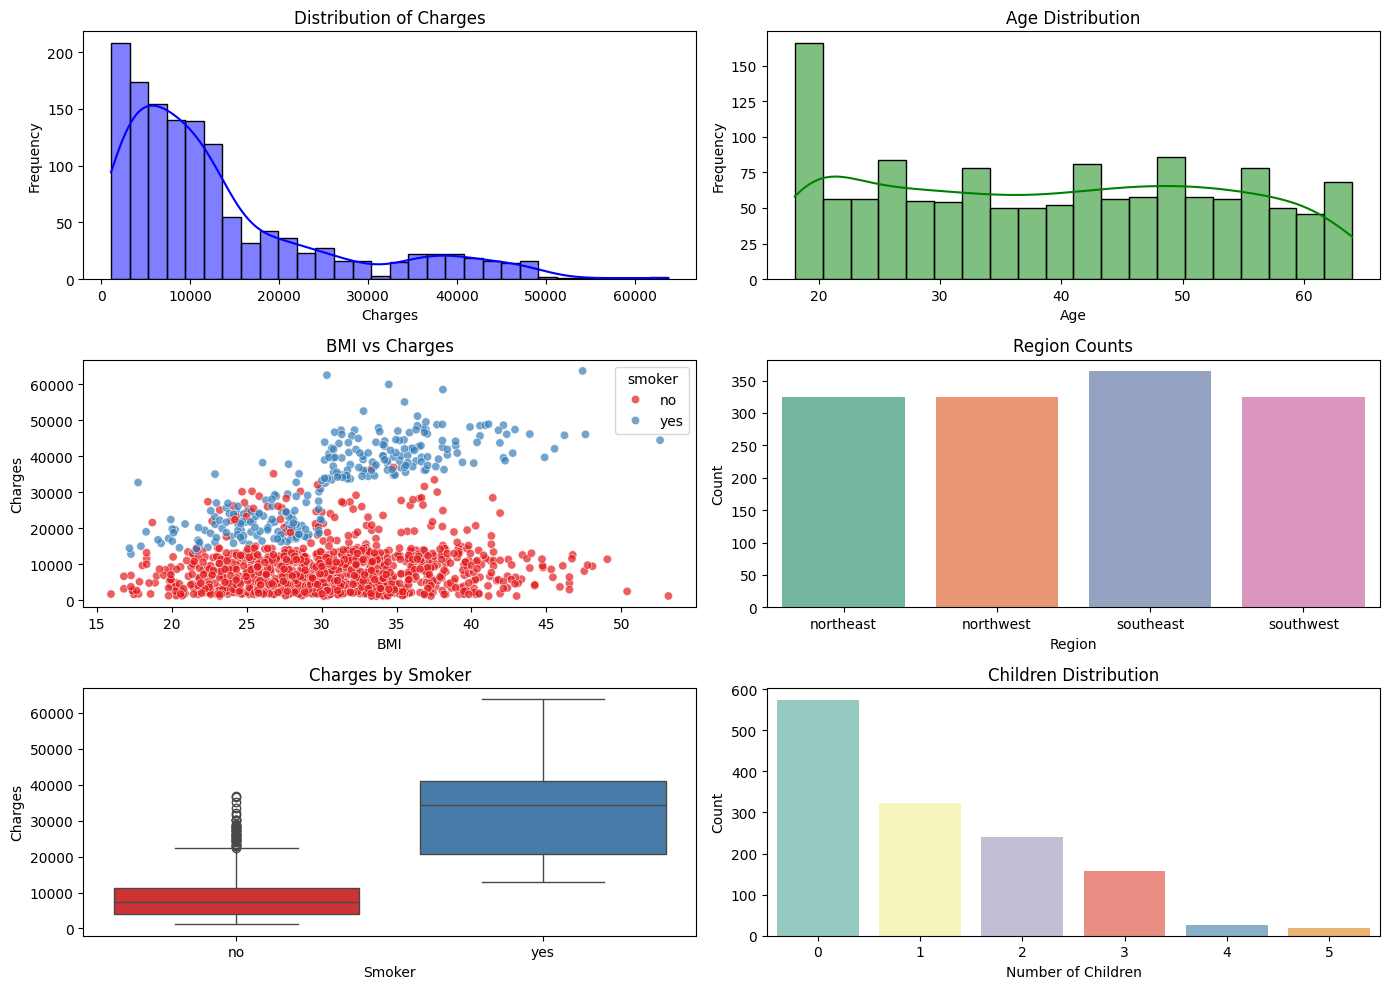

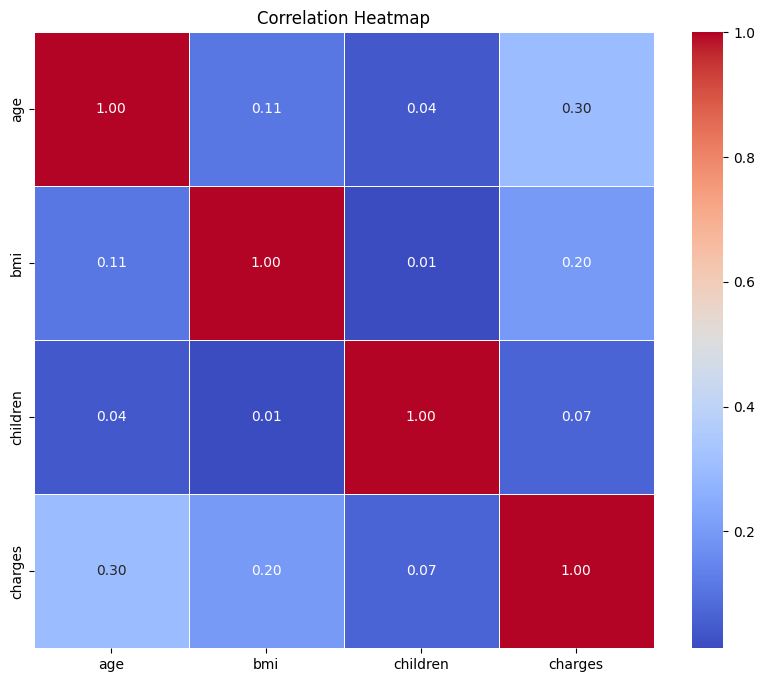

In [ ]:
################################################################################
# 데이터 시각화
################################################################################

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from URL
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-13/insurance.csv"
df = pd.read_csv(data_url)

# Ensure categorical columns are treated as categories
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

# Basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Visualizations
plt.figure(figsize=(14, 10))

# Distribution of Charges
plt.subplot(3, 2, 1)
sns.histplot(df['charges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Age Distribution
plt.subplot(3, 2, 2)
sns.histplot(df['age'], kde=True, bins=20, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI vs Charges
plt.subplot(3, 2, 3)
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.7)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Region Counts
plt.subplot(3, 2, 4)
sns.countplot(x='region', data=df, palette='Set2')
plt.title('Region Counts')
plt.xlabel('Region')
plt.ylabel('Count')

# Charges by Smoker
plt.subplot(3, 2, 5)
sns.boxplot(x='smoker', y='charges', data=df, palette='Set1')
plt.title('Charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Children Distribution
plt.subplot(3, 2, 6)
sns.countplot(x='children', data=df, palette='Set3')
plt.title('Children Distribution')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation Heatmap (Numerical Columns Only)
plt.figure(figsize=(10, 8))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
################################################################################
# Multiple Linear Regression
# Decision Tree Regression
################################################################################

# Check and install necessary packages
import subprocess
import sys

def install(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = ['pandas', 'scikit-learn', 'xgboost', 'lightgbm', 'numpy']
for package in required_packages:
    install(package)

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Load dataset from URL
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-13/insurance.csv"
df = pd.read_csv(data_url)

# Check and handle missing values
print("Checking for missing values...")
print(df.isnull().sum())  # Display the count of NaN values per column

# Ensure no missing values
assert not df.isnull().values.any(), "Data contains missing values!"

# Preprocessing
X = df.drop("charges", axis=1)
y = df["charges"]
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

# Updated sparse_output instead of sparse
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_features])
X_numerical = X[numerical_features]

X_preprocessed = pd.DataFrame(
    np.hstack([X_numerical, X_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    me = np.mean(y_pred - y_true)  # 평균 오차 (예측값 - 실제값)
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차
    rmse = np.sqrt(mse)  # 평균 제곱근 오차

    # Conditional MSLE calculation
    if (y_true > 0).all() and (y_pred > 0).all():
        msle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))  # 평균 제곱 오차 (로그 적용)
        rmsle = np.sqrt(msle)  # 평균 제곱근 오차 (로그 적용)
    else:
        msle = np.nan
        rmsle = np.nan

    mpe = np.mean((y_pred - y_true) / y_true) * 100  # 평균 비율 오차
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # 평균 절대 비율 오차
    r2 = r2_score(y_true, y_pred)  # R2 점수

    return {
        "ME": me,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MPE": mpe,
        "MAPE": mape,
        "R2": r2,
    }

# Initialize models
models = {
    "Multiple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Add explanations for each metric in Korean
metric_explanations = {
    "ME": "평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.",
    "MAE": "평균 절대 오차 (Mean Absolute Error): 예측값과 실제값의 절대적 차이의 평균. 낮을수록 좋음.",
    "MSE": "평균 제곱 오차 (Mean Squared Error): 예측값과 실제값의 제곱 차이 평균. 낮을수록 좋음.",
    "MSLE": "평균 제곱 오차 (로그 적용, Mean Squared Log Error): 로그 스케일에서의 평균 제곱 오차. 낮을수록 좋음.",
    "RMSE": "평균 제곱근 오차 (Root Mean Squared Error): 평균 제곱 오차의 제곱근. 낮을수록 좋음.",
    "RMSLE": "평균 제곱근 오차 (로그 적용, Root Mean Squared Log Error): 로그 스케일에서의 제곱근 오차. 낮을수록 좋음.",
    "MPE": "평균 비율 오차 (Mean Percentage Error): 예측값과 실제값의 비율 오차 평균. 0에 가까울수록 좋음.",
    "MAPE": "평균 절대 비율 오차 (Mean Absolute Percentage Error): 절대 비율 오차의 평균. 낮을수록 좋음.",
    "R2": "R2 점수 (Coefficient of Determination): 모델의 설명력을 나타냄. 1에 가까울수록 좋음.",
}

# Append explanations to results
print("\nModel Evaluation Results with Explanations:")
for metric, explanation in metric_explanations.items():
    print(f"{metric}: {explanation}")
    print(evaluation_results.loc[metric])
    print()

# Prediction
test_input = pd.DataFrame(
    [[55, 21, 2, "female", "no", "northeast"]],
    columns=["age", "bmi", "children", "sex", "smoker", "region"]
)

# Encode and predict
test_encoded = encoder.transform(test_input[categorical_features])
test_numerical = test_input[numerical_features]
test_preprocessed = pd.DataFrame(
    np.hstack([test_numerical, test_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_preprocessed)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["Predicted Charges"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Charges for Input:")
print(predictions_df)


Installing scikit-learn...
Checking for missing values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Model Evaluation Results:
      Multiple Linear Regression Decision Tree Regression
ME                    230.390130               882.648503
MAE                  4170.045013              3168.167350
MSE              33542077.406786          42828058.755682
MSLE                         NaN                 0.288989
RMSE                 5791.552245              6544.314995
RMSLE                        NaN                 0.537577
MPE                    23.612385                27.788142
MAPE                   46.264515                40.422802
R2                      0.783946                 0.724133

Model Evaluation Results with Explanations:
ME: 평균 오차 (Mean Error): 예측값과 실제값의 평균 차이. 0에 가까울수록 좋음.
Multiple Linear Regression    230.390130
Decision Tree Regression      882.648503
Name: ME, dtype: object

MAE: 평균 절대 오차 (Mea

<ipython-input-3-70554daa57fd>:108: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
<ipython-input-3-70554daa57fd>:154: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  predictions_df = pd.DataFrame(predictions, index=["Predicted Charges"]).applymap(lambda x: f"{x:.6f}")


In [ ]:
################################################################################
# Ridge Regression
# Lasso Regression
# Elastic Net Regression
# Random Forest Regression
# XGBoost
# LightGBM
################################################################################

# Check and install necessary packages
import subprocess
import sys

def install(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = ['pandas', 'scikit-learn', 'xgboost', 'lightgbm', 'numpy']
for package in required_packages:
    install(package)

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Load dataset from URL
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-13/insurance.csv"
df = pd.read_csv(data_url)

# Check and handle missing values
print("Checking for missing values...")
print(df.isnull().sum())  # Display the count of NaN values per column

# Ensure no missing values
assert not df.isnull().values.any(), "Data contains missing values!"

# Preprocessing
X = df.drop("charges", axis=1)
y = df["charges"]
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

# Updated sparse_output instead of sparse
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_features])
X_numerical = X[numerical_features]

X_preprocessed = pd.DataFrame(
    np.hstack([X_numerical, X_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    me = np.mean(y_pred - y_true)  # 평균 오차 (예측값 - 실제값)
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차
    rmse = np.sqrt(mse)  # 평균 제곱근 오차

    # Conditional MSLE calculation
    if (y_true > 0).all() and (y_pred > 0).all():
        msle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))  # 평균 제곱 오차 (로그 적용)
        rmsle = np.sqrt(msle)  # 평균 제곱근 오차 (로그 적용)
    else:
        msle = np.nan
        rmsle = np.nan

    mpe = np.mean((y_pred - y_true) / y_true) * 100  # 평균 비율 오차
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # 평균 절대 비율 오차
    r2 = r2_score(y_true, y_pred)  # R2 점수

    return {
        "ME": me,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MPE": mpe,
        "MAPE": mape,
        "R2": r2,
    }

# Initialize models
models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check for invalid prediction values
    if (y_pred < 0).any():
        print(f"Warning: Model {name} produced negative predictions. Adjusting values to zero.")
        y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

    results[name] = evaluate_model(y_test, y_pred)

# Format evaluation results for consistent decimal places
evaluation_results = pd.DataFrame(results)
evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")

# Display formatted results
print("\nModel Evaluation Results:")
print(evaluation_results)

# Prediction
test_input = pd.DataFrame(
    [[55, 21, 2, "female", "no", "northeast"]],
    columns=["age", "bmi", "children", "sex", "smoker", "region"]
)

# Encode and predict
test_encoded = encoder.transform(test_input[categorical_features])
test_numerical = test_input[numerical_features]
test_preprocessed = pd.DataFrame(
    np.hstack([test_numerical, test_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)

# Predictions for test input
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(test_preprocessed)[0]

# Format predictions for consistent decimal places
predictions_df = pd.DataFrame(predictions, index=["Predicted Charges"]).applymap(lambda x: f"{x:.6f}")

# Display predictions
print("\nPredicted Charges for Input:")
print(predictions_df)


Installing scikit-learn...
Checking for missing values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733

Model Evaluation Results:
      Ridge Regression Lasso Regression Elastic Net Regression  \
ME          230.704197       230.811984             318.771925   
MAE        4182.886840      4171.281194            7423.855423   
MSE    33592686.228366  33550700.878862        90268049.602763   
MSLE               NaN              NaN               0.609497   
RMSE       5795.919791      5792.296684            9500.949932   
RMSLE              NaN              NaN               0.780703   

<ipython-input-2-de85fef877e8>:114: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluation_results = evaluation_results.applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
<ipython-input-2-de85fef877e8>:140: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  predictions_df = pd.DataFrame(predictions, index=["Predicted Charges"]).applymap(lambda x: f"{x:.6f}")


Data Prediction:  [4.03316124]
결정 계수 (model.score):  0.3736465150465422
결정 계수 (r2_score):  0.3736465150465422
기울기: 0.7918214642474316
절편: -0.7177675452011343


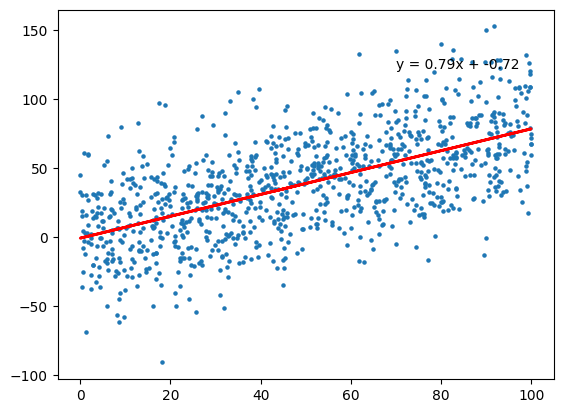

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 해당 구문이 사용된 파이썬 파일을 직접 실행했을 때만 아래 코드를 실행
if __name__ == '__main__':

    # 테스트용 데이터 생성
    x = np.random.rand(1000) * 100
    y = 0.8 * x + np.random.randn(1000) * 30

    # Linear Regression model 생성
    model = LinearRegression()

    # Linear Regression model 학습
    model.fit(x.reshape(-1, 1), y)

    # Prediction
    y_new = model.predict(np.array([6]).reshape((-1, 1)))
    print("Data Prediction: ", y_new)

    # Linear Regression model 평가
    r_sq = model.score(x.reshape(-1, 1), y)
    print("결정 계수 (model.score): ", r_sq)
    r2 = r2_score(y, model.predict(x.reshape(-1, 1)))
    print("결정 계수 (r2_score): ", r2)

    # Linear Model 식
    b0, b1 = model.intercept_, model.coef_[0]
    print("기울기:", model.coef_[0])
    print("절편:", model.intercept_)

    # 시각화
    plt.scatter(x, y, s=5)
    plt.plot(x, model.predict(x.reshape(-1, 1)), color='red', linewidth=2)
    plt.annotate(f'y = {b1:.2f}x + {b0:.2f}', xy=(0.7 * max(x), 0.8 * max(y)))
    plt.show()


Linear Regression 결정계수 (R²): 0.8436532535792486
SGD Regressor 결정계수 (R²): 0.8436527380924773
Linear Regression 기울기 계수: [23.64819973 -0.35550562 -0.41056547]
SGD Regressor 기울기 계수: [23.60342113 -0.35806858 -0.39089427]


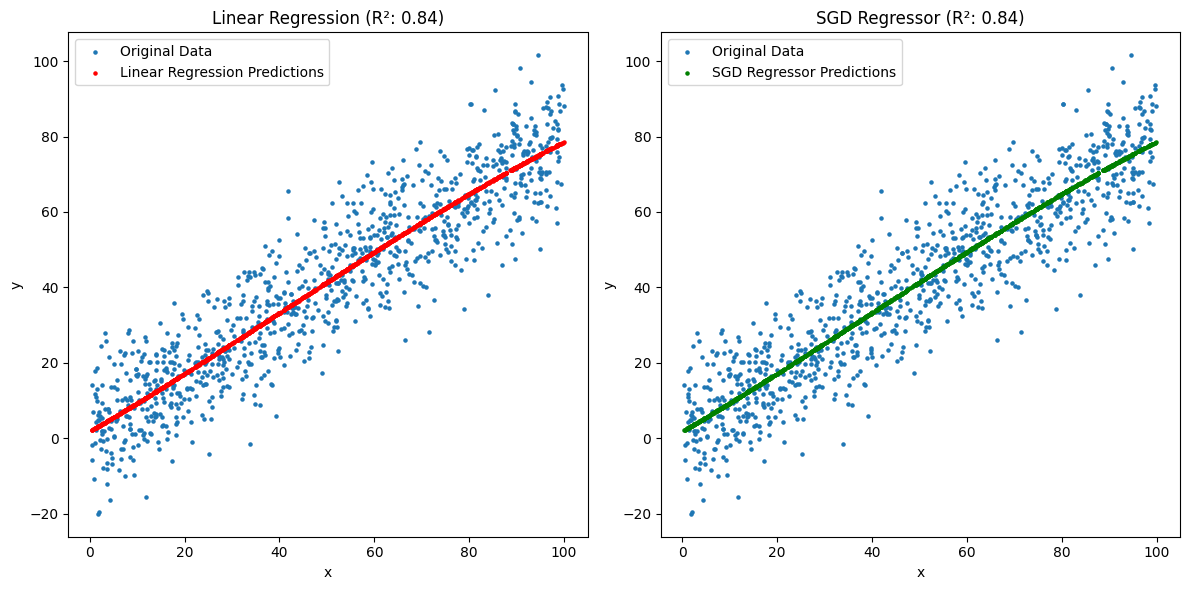

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

if __name__ == '__main__':

    # 테스트용 데이터 생성 (잡음 추가 감소)
    np.random.seed(42)
    x = np.random.rand(1000) * 100  # 독립 변수
    noise = np.random.randn(1000) * 10  # 잡음 크기 감소
    y = 0.8 * x + noise  # 종속 변수

    # 데이터 정규화
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x.reshape(-1, 1))

    # Polynomial Features 추가 (3차 다항식)
    poly = PolynomialFeatures(degree=3, include_bias=False)
    x_poly = poly.fit_transform(x_scaled)

    # Linear Regression 모델
    model_lr = LinearRegression()
    model_lr.fit(x_poly, y)
    y_pred_lr = model_lr.predict(x_poly)
    r2_lr = r2_score(y, y_pred_lr)

    # SGDRegressor 모델 (하이퍼파라미터 최적화)
    model_sgd = SGDRegressor(
        max_iter=2000,
        tol=1e-4,
        random_state=42,
        eta0=0.01,
        learning_rate='adaptive'
    )
    model_sgd.fit(x_poly, y)
    y_pred_sgd = model_sgd.predict(x_poly)
    r2_sgd = r2_score(y, y_pred_sgd)

    # 결과 출력
    print("Linear Regression 결정계수 (R²):", r2_lr)
    print("SGD Regressor 결정계수 (R²):", r2_sgd)
    print("Linear Regression 기울기 계수:", model_lr.coef_)
    print("SGD Regressor 기울기 계수:", model_sgd.coef_)

    # 시각화
    plt.figure(figsize=(12, 6))

    # 원본 데이터와 Linear Regression 시각화
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, s=5, label="Original Data")
    plt.scatter(x, y_pred_lr, color='red', s=5, label="Linear Regression Predictions")
    plt.title(f"Linear Regression (R²: {r2_lr:.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    # 원본 데이터와 SGD Regressor 시각화
    plt.subplot(1, 2, 2)
    plt.scatter(x, y, s=5, label="Original Data")
    plt.scatter(x, y_pred_sgd, color='green', s=5, label="SGD Regressor Predictions")
    plt.title(f"SGD Regressor (R²: {r2_sgd:.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
# Check and install necessary packages
import subprocess
import sys

def install(package):
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of required packages
required_packages = ['pandas', 'scikit-learn', 'numpy']
for package in required_packages:
    install(package)

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Load dataset from URL
data_url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-13/insurance.csv"
df = pd.read_csv(data_url)

# Check and handle missing values
print("Checking for missing values...")
print(df.isnull().sum())  # Display the count of NaN values per column

# Ensure no missing values
assert not df.isnull().values.any(), "Data contains missing values!"

# Preprocessing
X = df.drop("charges", axis=1)
y = df["charges"]
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop="first")
X_encoded = encoder.fit_transform(X[categorical_features])
X_numerical = X[numerical_features]

X_preprocessed = pd.DataFrame(
    np.hstack([X_numerical, X_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Standardize features for SGDRegressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    me = np.mean(y_pred - y_true)  # 평균 오차
    mae = mean_absolute_error(y_true, y_pred)  # 평균 절대 오차
    mse = mean_squared_error(y_true, y_pred)  # 평균 제곱 오차
    rmse = np.sqrt(mse)  # 평균 제곱근 오차

    # Conditional MSLE calculation
    if (y_true > 0).all() and (y_pred > 0).all():
        msle = mean_squared_error(np.log1p(y_true), np.log1p(y_pred))  # 평균 제곱 오차 (로그 적용)
        rmsle = np.sqrt(msle)  # 평균 제곱근 오차 (로그 적용)
    else:
        msle = np.nan
        rmsle = np.nan

    mpe = np.mean((y_pred - y_true) / y_true) * 100  # 평균 비율 오차
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # 평균 절대 비율 오차
    r2 = r2_score(y_true, y_pred)  # R2 점수

    return {
        "ME": me,
        "MAE": mae,
        "MSE": mse,
        "MSLE": msle,
        "RMSE": rmse,
        "RMSLE": rmsle,
        "MPE": mpe,
        "MAPE": mape,
        "R2": r2,
    }

# Train and evaluate SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, penalty='l2', alpha=0.01, learning_rate='adaptive')
sgd_model.fit(X_train_scaled, y_train)
y_pred = sgd_model.predict(X_test_scaled)

# Check for invalid prediction values
if (y_pred < 0).any():
    print("Warning: Model produced negative predictions. Adjusting values to zero.")
    y_pred = np.maximum(y_pred, 0)  # Replace negative predictions with 0

# Evaluate the model
evaluation_results = evaluate_model(y_test, y_pred)

# Display formatted results
evaluation_df = pd.DataFrame([evaluation_results], index=["SGDRegressor"]).applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
print("\nSGDRegressor Evaluation Results:")
print(evaluation_df)

# Prediction for new input
test_input = pd.DataFrame(
    [[55, 21, 2, "female", "no", "northeast"]],
    columns=["age", "bmi", "children", "sex", "smoker", "region"]
)

# Encode and preprocess new input
test_encoded = encoder.transform(test_input[categorical_features])
test_numerical = test_input[numerical_features]
test_preprocessed = pd.DataFrame(
    np.hstack([test_numerical, test_encoded]),
    columns=numerical_features + encoder.get_feature_names_out().tolist()
)
test_scaled = scaler.transform(test_preprocessed)

# Predict charges for the input
predicted_charge = sgd_model.predict(test_scaled)[0]
print("\nPredicted Charges for Input:")
print(f"SGDRegressor: {predicted_charge:.6f}")


Installing scikit-learn...
Checking for missing values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

SGDRegressor Evaluation Results:
                      ME          MAE              MSE MSLE         RMSE  \
SGDRegressor  227.600084  4188.621714  33652266.161196  NaN  5801.057331   

             RMSLE        MPE       MAPE        R2  
SGDRegressor   NaN  24.704393  46.793568  0.783236  

Predicted Charges for Input:
SGDRegressor: 10141.031418


<ipython-input-7-fc67a42b45a3>:105: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  evaluation_df = pd.DataFrame([evaluation_results], index=["SGDRegressor"]).applymap(lambda x: f"{x:.6f}" if pd.notnull(x) else "NaN")
